# Low-storage Runke-Kutta schemes

По мотив статьи https://www.sciencedirect.com/science/article/pii/S0021999111005213 [1]

# 1. Общие сведения

В проекте рассматривается реализация low-storage методов Рунге-Кутты с 12ю,13ю и 14ю стадиями соответственно, предлолженными в работе [1] (надо проставить нормальное цитирование)

Один шаг LSRK можно записать в виде

$K_1=y_n \\ \text{for i = 1...s}\\\;\;\;K_2=A_iK_2+\Delta t F(t_n+c_i\Delta t,K_1)\\\;\;\;K_1=K_1+B_iK_2 \\ y_{n+1}=K_1$

Коэффициенты для методов, представленных в статье имеют вид :

## 1.1 Inviscid 

![inviscid](inviscid.png)

## 1.2 Elliptical

![elliptical](elliptical.png)

## 1.3 Circular

![circular](circular.png)

## 1.4 Реализация в виде класса

In [44]:
class Runge_Kutta_LSRK:
    def __init__(self,F,y0,start,end,LSRK_TYPE):
        self.F=F
        self.start=start
        self.end=end
        self.y=[y0]
        self.t=[start]
        if LSRK_TYPE == "inviscid":
            self.A=[0.0000000000000000,
                -0.0923311242368072,
                -0.9441056581158819,
                -4.3271273247576394,
                -2.1557771329026072,
                -0.9770727190189062,
                -0.7581835342571139,
                -1.7977525470825499,
                -2.6915667972700770,
                -4.6466798960268143,
                -0.1539613783825189,
                -0.5943293901830616]
            self.B=[0.0650008435125904,
                0.0161459902249842,
                0.5758627178358159,
                0.1649758848361671,
                0.3934619494248182,
                0.0443509641602719,
                0.2074504268408778,
                0.6914247433015102,
                0.3766646883450449,
                0.0757190350155483,
                0.2027862031054088,
                0.2167029365631842]
            self.c=[0.0000000000000000,
                0.0650008435125904,
                0.0796560563081853,
                0.1620416710085376,
                0.2248877362907778,
                0.2952293985641261,
                0.3318332506149405,
                0.4094724050198658,
                0.6356954475753369,
                0.6806551557645497,
                0.7143773712418350,
                0.9032588871651854]
            self.gamma=[1,
                    1/2,
                    1/6,
                    1/24,
                    7.7793114345018587*10**(-3),
                    1.2973631162180358*10**(-3),
                    1.4820214027731423*10**(-4),
                    1.8551101042762935*10**(-5),
                    1.2351886928579280*10**(-6),
                    1.2377768810554030*10**(-7),
                    3.7434529900414887*10**(-9),
                    3.1278890521988389*10**(-10)]
        elif LSRK_TYPE == "elliptical":
            self.A=[0.0000000000000000,
                    -0.6160178650170565,
                    -0.4449487060774118,
                    -1.0952033345276178,
                    -1.2256030785959187,
                    -0.2740182222332805,
                    -0.0411952089052647,
                    -0.1797084899153560,
                    -1.1771530652064288,
                    -0.4078831463120878,
                    -0.8295636426191777,
                    -4.7895970584252288,
                    -0.6606671432964504]
            self.B=[0.0650008435125904,
                    0.0161459902249842,
                    0.5758627178358159,
                    0.1649758848361671,
                    0.3934619494248182,
                    0.0443509641602719,
                    0.2074504268408778,
                    0.6914247433015102,
                    0.3766646883450449,
                    0.0757190350155483,
                    0.2027862031054088,
                    0.2167029365631842]
            self.c=[0.0000000000000000,
                    0.0650008435125904,
                    0.0796560563081853,
                    0.1620416710085376,
                    0.2248877362907778,
                    0.2952293985641261,
                    0.3318332506149405,
                    0.4094724050198658,
                    0.6356954475753369,
                    0.6806551557645497,
                    0.7143773712418350,
                    0.9032588871651854]
        elif LSRK_TYPE == "circular":
            self.A=[]
            self.B=[]
            self.c=[]
        
    def compute(self,iterations):
        step=(self.end-self.start)/iterations
        s=len(self.A)
        for j in range(iterations):
            K1=self.y[-1]
            K2=0
            for i in range(s):
                K2=self.A[i]*K2+step*self.F(self.t[-1]+self.c[i]*step,K1)
                K1=K1+self.B[i]*K2
            self.y.append(K1)
            self.t.append(self.t[-1]+step)
        return self.t,self.y

# 2.Примеры решений

## 2.1 ОДУ из второй задачи 7дз (физический смысл - ?)

$$u'(t)=v(t) \\ v'(t)=-u^3(t),t\in[0,T]\\u(0)=1,v(0)=0$$

In [45]:
import numpy as np
def f(t,x):
    answer=np.zeros(2)
    answer[0],answer[1]=x[1],x[0]
    answer[1]=-answer[1]*answer[1]*answer[1]
    return answer

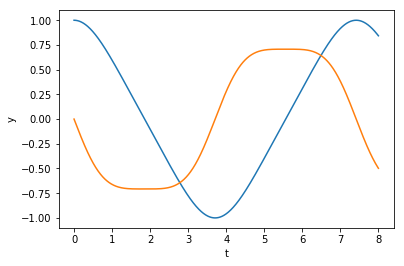

In [47]:
import matplotlib.pyplot as plt
import math
LSRK=Runge_Kutta_LSRK(F=f,y0=np.array([1,0]),start=0,end=8,LSRK_TYPE='inviscid')
t_values,y_values=LSRK.compute(1000)

plt.plot(t_values, y_values)

plt.xlabel('t')
plt.ylabel('y')

plt.figure
plt.show()

In [51]:
def get_delta(iterations):

    LSRK=Runge_Kutta_LSRK(F=f,y0=np.array([1,0]),start=0,end=7.416298709205487,LSRK_TYPE='inviscid')
    t_values,y_values=LSRK.compute(iterations)
    
    return 7.416298709205487/iterations, np.linalg.norm(y_values[-1]-y_values[0])

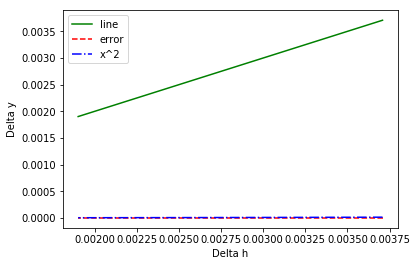

In [52]:
Deltas=[]
steps=[]
for i in range(2000,4000,100):
    Deltas.append(get_delta(i)[1])
    steps.append(get_delta(i)[0])
Par=[]
for i in range(len(steps)):
    Par.append(steps[i]**2)

plt.plot(steps, steps, color='g',label='line')
plt.plot(steps, Deltas,color='r',linestyle='--',label='error')
plt.plot(steps, Par,color='b',linestyle='-.',label='x^2')
plt.legend()
plt.xlabel("Delta h")
plt.ylabel("Delta y")
plt.show()

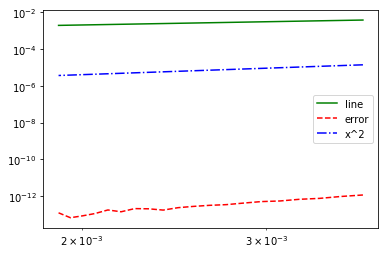

In [53]:
plt.plot(steps, steps, color='g',label='line')
plt.plot(steps, Deltas,color='r',linestyle='--',label='error')
plt.plot(steps, Par,color='b',linestyle='-.',label='x^2')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

In [54]:
Deltas=np.log(Deltas)
steps=np.log(steps)
print("k_log_error = {}".format(np.polyfit(steps, Deltas, 1)[0]))

k_log_error = 3.8223957698579802


## 2.2 Маятник из первой задачи

$$\alpha'(t)=\theta(t)\\ \theta'(t)=-\sin \alpha(t),t\in[0,T]\\\alpha(0)=\pi/2,\theta(0)=0$$

In [56]:
y0=np.array([np.pi/2,0])

In [59]:
T=4*1.854074677301372

In [62]:
def pendulum(t,y):
    answer=np.zeros(2)
    answer[0]=y[1]
    answer[1]=-np.sin(y[0])
    return answer

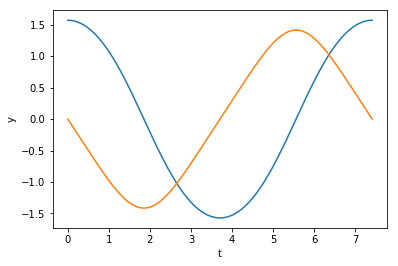

In [63]:
LSRK=Runge_Kutta_LSRK(F=pendulum,y0=y0,start=0,end=T,LSRK_TYPE='inviscid')
t_values,y_values=LSRK.compute(1000)

plt.plot(t_values, y_values)

plt.xlabel('t')
plt.ylabel('y')

plt.figure
plt.show()

_Дальше : заготовка на питоне для уравнения переноса. Аппроксимация уравнения переноса - там уже визуализация, тест кейс, проверка по времени_